# ИМПОРТ БИБЛИОТЕК



In [1]:
!pip install pandas numpy matplotlib seaborn scipy -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР

In [2]:
# Загрузка данных

print("ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР")


df = pd.read_csv('shopping_behavior.csv') # Загружает CSV-файл в DataFrame

print("\nПервые 5 строк:")
print(df.head()) #Показывает первые 5 строк DataFrame для быстрого просмотра

print("\nПоследние 5 строк:")
print(df.tail()) # Показывает последние 5 строк DataFrame

print("\nРазмер данных: %d строк, %d столбцов" % (df.shape[0], df.shape[1]))
# df.shape возвращает кортеж (строки, столбцы)
# shape[0] - количество строк
# shape[1] - количество столбцов

print("\nТипы данных:")
print(df.dtypes)# Показывает тип данных каждого столбца

print("\nОсновная информация о датасете:")
print(df.info())                    # Выводит подзаголовок
print(df.info())                    # Выводит подробную информацию:
                                    # - названия столбцов
                                    # - тип данных каждого столбца
                                    # - количество ненулевых значений
                                    # - использование памяти

# Преобразуем типы данных
categorical_cols = ['Gender', 'Item Purchased', 'Category', 'Location', 'Size',
                   'Color', 'Season', 'Subscription Status', 'Shipping Type',
                   'Discount Applied', 'Promo Code Used', 'Payment Method',
                   'Frequency of Purchases']

for col in categorical_cols: # Цикл по всем столбцам из списка
    if col in df.columns:   # Проверяет, существует ли столбец в DataFrame
        df[col] = df[col].astype('category')      # Преобразует тип столбца в 'category'

print("\nТипы после преобразования:")
print(df.dtypes)   # Снова показывает типы данных, чтобы убедиться в преобразовании


ЗАГРУЗКА И ПЕРВИЧНЫЙ ОБЗОР

Первые 5 строк:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping 

# ОБРАБОТКА ДАННЫХ


In [3]:

print(" ОБРАБОТКА ДАННЫХ")

# 1. Пропущенные значения
print("\n1. Пропущенные значения:")
missing = df.isnull().sum() # Подсчет количества пропущенных значений в каждом столбце DataFrame
missing_percentage = (missing / len(df)) * 100 # Расчет процента пропущенных значений в каждом столбце

# Создание DataFrame с результатами
missing_df = pd.DataFrame({
    'Пропущенные значения': missing,
    'Процент': missing_percentage
})
print(missing_df[missing_df['Пропущенные значения'] > 0]) # Вывод только тех столбцов, где есть пропущенные значения

if missing.sum() == 0: # Проверка, есть ли вообще пропущенные значения
    print("Пропущенных значений нет!")

# 2. Дубликаты
print("\n2. Дубликаты:")
duplicates = df.duplicated().sum() # Подсчет количества полных дубликатов строк
print("Количество дубликатов: %d" % duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True) # Удаление дубликатов
    print("Дубликаты удалены")
    print("Новый размер данных: %d строк, %d столбцов" % (df.shape[0], df.shape[1]))

# 3. Выбросы в числовых столбцах
print("\n3. Анализ выбросов в числовых данных:")
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases'] # Список числовых столбцов для анализа
for col in numeric_cols: # Анализ выбросов для каждого числового столбца
    if col in df.columns:
        Q1 = df[col].quantile(0.25)  # Расчет первых 25%
        Q3 = df[col].quantile(0.75) #Расчет третьих 25%
        IQR = Q3 - Q1 #Расчет межквартального размаха
        lower_bound = Q1 - 1.5 * IQR # Расчет нижней границы для выбросов
        upper_bound = Q3 + 1.5 * IQR # Расчет верхней границы для выбросов

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)] # Поиск выбросов (значения за пределами [lower_bound, upper_bound])
        print("  %s: %d выбросов (%.1f%% данных)" % (col, len(outliers), len(outliers)/len(df)*100))

# 4. Статистический анализ
print("\n4. Статистический анализ числовых данных:")
print("Описательная статистика числовых столбцов:")
print(df[numeric_cols].describe()) # Вывод описательных статистик для числовых столбцов

print("\nРаспределение по полу:")
print(df['Gender'].value_counts())  #Вывод распределения значений в столбце 'Gender'

print("\nРаспределение по категориям товаров:")
print(df['Category'].value_counts()) # Вывод распределения значений в столбце 'Category'


 ОБРАБОТКА ДАННЫХ

1. Пропущенные значения:
Empty DataFrame
Columns: [Пропущенные значения, Процент]
Index: []
Пропущенных значений нет!

2. Дубликаты:
Количество дубликатов: 0

3. Анализ выбросов в числовых данных:
  Age: 0 выбросов (0.0% данных)
  Purchase Amount (USD): 0 выбросов (0.0% данных)
  Review Rating: 0 выбросов (0.0% данных)
  Previous Purchases: 0 выбросов (0.0% данных)

4. Статистический анализ числовых данных:
Описательная статистика числовых столбцов:
               Age  Purchase Amount (USD)  Review Rating  Previous Purchases
count  3900.000000            3900.000000    3900.000000         3900.000000
mean     44.068462              59.764359       3.749949           25.351538
std      15.207589              23.685392       0.716223           14.447125
min      18.000000              20.000000       2.500000            1.000000
25%      31.000000              39.000000       3.100000           13.000000
50%      44.000000              60.000000       3.700000         

# ВИЗУАЛИЗАЦИЯ ДАННЫХ

C. ВИЗУАЛИЗАЦИЯ ДАННЫХ


/tmp/ipython-input-4227344953.py:47: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(gender_groups, labels=gender_labels)


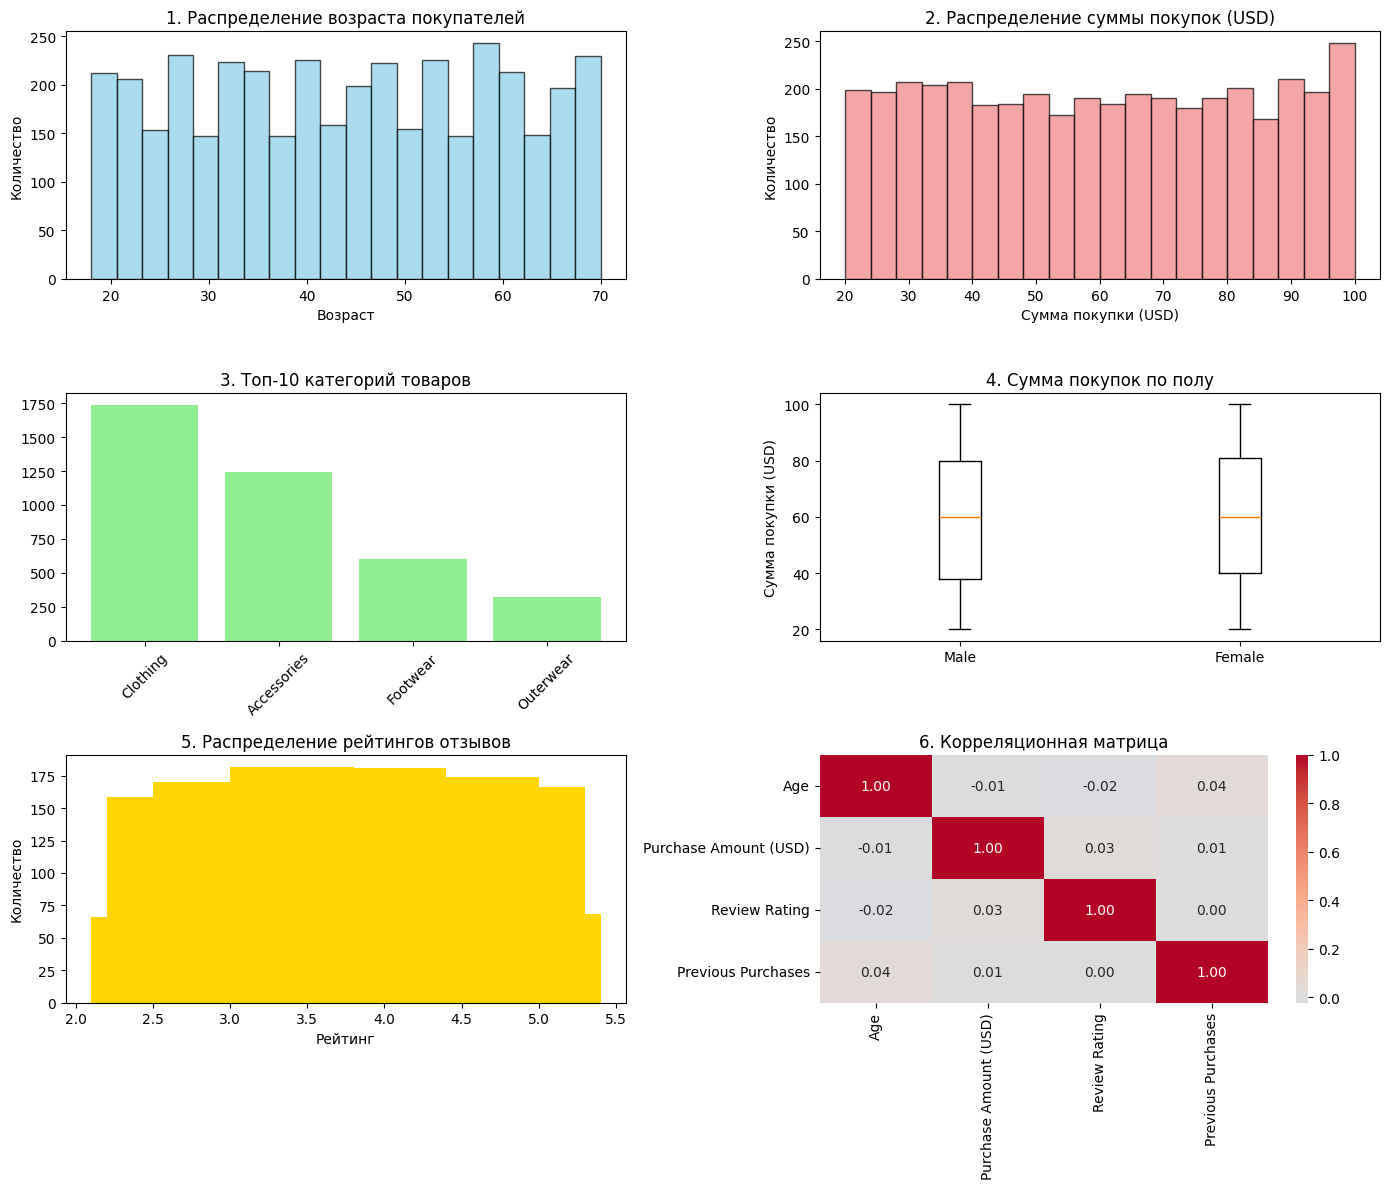

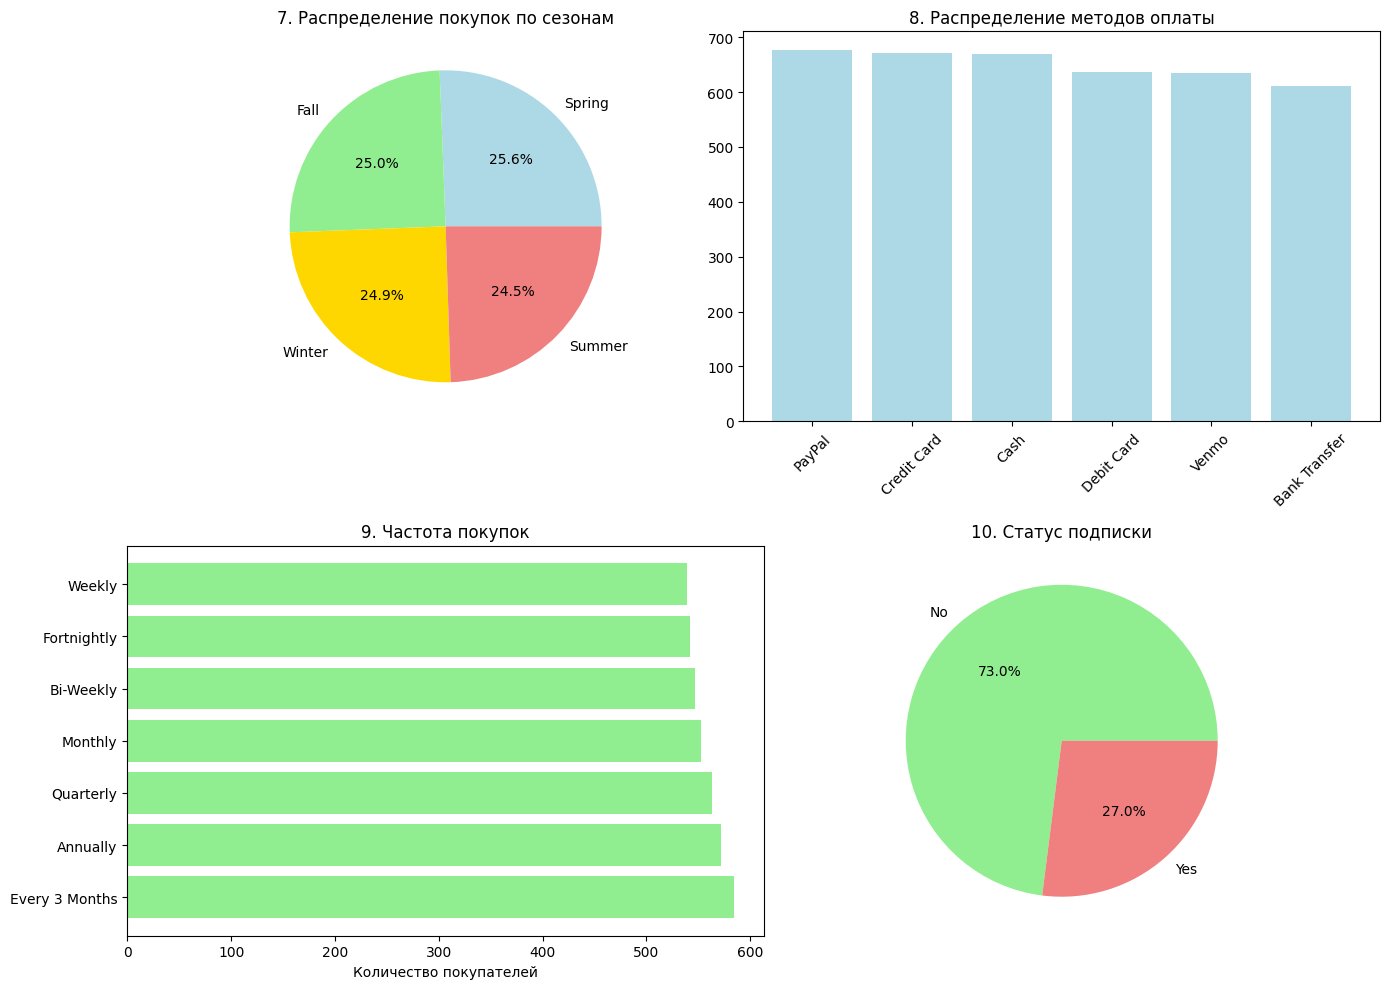

In [4]:

print("C. ВИЗУАЛИЗАЦИЯ ДАННЫХ")

# Создаем фигуру и оси для размещения графиков
# 3 строки, 2 столбца графиков, общий размер холста 14x12 дюймов
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# 1. График распределения возраста покупателей (позиция [0,0] - первая строка, первый столбец)
# Гистограмма с 20 интервалами (bins), черными границами, прозрачностью 0.7, голубым цветом заливки
axes[0, 0].hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
# Установка заголовка для этого графика
axes[0, 0].set_title('1. Распределение возраста покупателей')
# Подпись оси X (горизонтальной оси)
axes[0, 0].set_xlabel('Возраст')
# Подпись оси Y (вертикальной оси)
axes[0, 0].set_ylabel('Количество')

# 2. График распределения суммы покупок (позиция [0,1] - первая строка, второй столбец)
# Гистограмма для сумм покупок с 20 интервалами, светлокоралловым цветом
axes[0, 1].hist(df['Purchase Amount (USD)'], bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].set_title('2. Распределение суммы покупок (USD)')
axes[0, 1].set_xlabel('Сумма покупки (USD)')
axes[0, 1].set_ylabel('Количество')

# 3. Топ-10 категорий товаров (позиция [1,0] - вторая строка, первый столбец)
# Получаем 10 самых популярных категорий: считаем количество каждой, берем первые 10
top_categories = df['Category'].value_counts().head(10)
# Создаем столбчатую диаграмму: индекс - названия категорий, значения - количество
axes[1, 0].bar(top_categories.index, top_categories.values, color='lightgreen')
axes[1, 0].set_title('3. Топ-10 категорий товаров')
# Поворачиваем подписи на оси X на 45 градусов для лучшей читаемости длинных названий
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Boxplot для сравнения суммы покупок по полу (позиция [1,1] - вторая строка, второй столбец)
# Создаем пустые списки для данных и меток
gender_groups = []  # Будет содержать массивы сумм покупок для каждого пола
gender_labels = []  # Будет содержать названия полов

# Проходим по всем уникальным значениям в столбце Gender
for gender in df['Gender'].unique():
    # Фильтруем DataFrame по текущему полу и выбираем столбец с суммой покупок
    # Добавляем эти данные в список gender_groups
    gender_groups.append(df[df['Gender'] == gender]['Purchase Amount (USD)'])
    # Добавляем название пола в список меток
    gender_labels.append(gender)

# Создаем boxplot (ящик с усами): график, показывающий медиану, квартили и выбросы
axes[1, 1].boxplot(gender_groups, labels=gender_labels)
axes[1, 1].set_title('4. Сумма покупок по полу')
axes[1, 1].set_ylabel('Сумма покупки (USD)')

# 5. Распределение рейтингов отзывов (позиция [2,0] - третья строка, первый столбец)
# Считаем количество каждого рейтинга и сортируем по возрастанию значения рейтинга
rating_counts = df['Review Rating'].value_counts().sort_index()
# Столбчатая диаграмма для рейтингов, золотистого цвета
axes[2, 0].bar(rating_counts.index, rating_counts.values, color='gold')
axes[2, 0].set_title('5. Распределение рейтингов отзывов')
axes[2, 0].set_xlabel('Рейтинг')
axes[2, 0].set_ylabel('Количество')
# Устанавливаем отметки на оси X от 2 до 6 с шагом 0.5
axes[2, 0].set_xticks(np.arange(2, 6, 0.5))

# 6. Корреляционная матрица (позиция [2,1] - третья строка, второй столбец)
# Выбираем только числовые столбцы из DataFrame
numeric_df = df[numeric_cols]  # numeric_cols должен быть определен ранее в коде
# Вычисляем матрицу корреляции
correlation = numeric_df.corr()
# Создаем heatmap с помощью seaborn
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=axes[2, 1])
# Параметры: annot=True - показывать значения в ячейках, fmt='.2f' - формат чисел с 2 знаками после запятой
# cmap='coolwarm' - цветовая схема от синего (холодные) к красному (теплые)
# center=0 - центр цветовой шкалы на 0
# ax=axes[2, 1] - указание, на какой оси рисовать
axes[2, 1].set_title('6. Корреляционная матрица')

# Автоматически настраиваем отступы между графиками, чтобы они не перекрывались
plt.tight_layout()
# Отображаем все графики первой фигуры
plt.show()

# Дополнительные графики - создаем вторую фигуру
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

# 7. Распределение покупок по сезонам (позиция [0,0] - первая строка, первый столбец второй фигуры)
# Считаем количество покупок в каждом сезоне
season_counts = df['Season'].value_counts()
# Круговая диаграмма (pie chart)
axes2[0, 0].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%',
                colors=['lightblue', 'lightgreen', 'gold', 'lightcoral'])
# Параметры: season_counts.values - данные для диаграммы
# season_counts.index - подписи для секторов
# autopct='%1.1f%%' - автоматическое отображение процентов с 1 знаком после запятой
# colors - заданная палитра цветов для секторов
axes2[0, 0].set_title('7. Распределение покупок по сезонам')

# 8. Распределение методов оплаты (позиция [0,1] - первая строка, второй столбец)
# Считаем количество использования каждого метода оплаты
payment_counts = df['Payment Method'].value_counts()
# Столбчатая диаграмма
axes2[0, 1].bar(payment_counts.index, payment_counts.values, color='lightblue')
axes2[0, 1].set_title('8. Распределение методов оплаты')
# Поворачиваем подписи на 45 градусов
axes2[0, 1].tick_params(axis='x', rotation=45)

# 9. Частота покупок (позиция [1,0] - вторая строка, первый столбец)
# Считаем количество покупателей для каждой частоты покупок
freq_counts = df['Frequency of Purchases'].value_counts()
# Горизонтальная столбчатая диаграмма (barh вместо bar)
axes2[1, 0].barh(freq_counts.index, freq_counts.values, color='lightgreen')
axes2[1, 0].set_title('9. Частота покупок')
axes2[1, 0].set_xlabel('Количество покупателей')

# 10. Статус подписки (позиция [1,1] - вторая строка, второй столбец)
# Считаем количество покупателей по статусу подписки
sub_counts = df['Subscription Status'].value_counts()
# Круговая диаграмма
axes2[1, 1].pie(sub_counts.values, labels=sub_counts.index, autopct='%1.1f%%',
                colors=['lightgreen', 'lightcoral'])
axes2[1, 1].set_title('10. Статус подписки')

# Автоматически настраиваем отступы для второй фигуры
plt.tight_layout()
# Отображаем все графики второй фигуры
plt.show()

# ГРУППИРОВКИ И АГРЕГАЦИИ

In [5]:

print("ГРУППИРОВКИ И АГРЕГАЦИИ")

# 1. Простая группировка по полу
print("\n1. Средняя сумма покупки по полу:")

# Группировка данных по столбцу 'Gender' и агрегация по столбцу 'Purchase Amount (USD)'
# agg(['mean', 'sum', 'count']) - вычисление трех метрик: среднего значения, суммы и количества
gender_stats = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count'])

# Вывод результата с округлением до 2 знаков после запятой
print(gender_stats.round(2))

# 2. Группировка по категориям
print("\n2. Топ-5 категорий по продажам:")

# Группировка по категориям, суммирование продаж, сортировка по убыванию, выбор первых 5
category_stats = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)

# Вывод результата
print(category_stats.round(2))

# 3. Группировка по локациям
print("\n3. Топ-5 городов по количеству покупок:")

# Группировка по локациям, подсчет количества строк (покупок) в каждой группе
# size() возвращает количество элементов в каждой группе
location_stats = df.groupby('Location').size().sort_values(ascending=False).head(5)

print(location_stats)

# 4. Группировка по сезонам
print("\n4. Продажи по сезонам:")

# Группировка по сезонам, вычисление суммы и среднего значения продаж
season_stats = df.groupby('Season')['Purchase Amount (USD)'].agg(['sum', 'mean'])

print(season_stats.round(2))

# 5. Группировка по статусу подписки
print("\n5. Подписчики vs Неподписчики:")

# Группировка по статусу подписки, вычисление среднего значения продаж
sub_stats = df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

print(sub_stats.round(2))

# 6. Простая сводная таблица (pivot table)
print("\n6. Средняя сумма покупки по категории и полу:")

# Создание сводной таблицы с помощью pivot_table
pivot_simple = df.pivot_table(
    values='Purchase Amount (USD)',  # Значения для агрегации
    index='Category',                # Строки таблицы
    columns='Gender',                # Столбцы таблицы
    aggfunc='mean'                   # Функция агрегации - среднее значение
)

print(pivot_simple.round(2))

# 7. Анализ по возрастным группам
print("\n7. Покупатели по возрастным группам:")

# Создание нового столбца с возрастными группами с помощью pd.cut()
# Разбиваем возраст на интервалы: [0,25], (25,35], (35,45], (45,55], (55,100]
# labels - названия для каждой группы
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100],
                        labels=['<25', '25-34', '35-44', '45-54', '55+'])

# Группировка по возрастным группам с разными агрегатными функциями для разных столбцов
age_group_stats = df.groupby('Age_Group').agg({
    'Purchase Amount (USD)': 'mean',  # Средняя сумма покупки
    'Customer ID': 'count'            # Количество покупок (по количеству уникальных Customer ID)
})

# Переименование столбцов для лучшей читаемости
age_group_stats.columns = ['Средняя сумма', 'Количество покупок']

print(age_group_stats.round(2))

# 8. Анализ по частоте покупок
print("\n8. Средняя сумма по частоте покупок:")

# Группировка по частоте покупок, вычисление среднего, сортировка по убыванию
freq_stats = df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

print(freq_stats.round(2))

# 9. Анализ по рейтингам
print("\n9. Средняя сумма покупки по рейтингу:")

# Группировка по рейтингу отзывов, вычисление среднего значения суммы покупки
rating_stats = df.groupby('Review Rating')['Purchase Amount (USD)'].mean()

print(rating_stats.round(2))

# 10. Анализ методов оплаты
print("\n10. Популярность методов оплаты:")

# Подсчет количества использования каждого метода оплаты (value_counts возвращает отсортированный результат)
payment_counts = df['Payment Method'].value_counts()

print(payment_counts) #Выводит на экран результаты подсчета популярности методов оплаты

ГРУППИРОВКИ И АГРЕГАЦИИ

1. Средняя сумма покупки по полу:
         mean     sum  count
Gender                      
Female  60.25   75191   1248
Male    59.54  157890   2652

2. Топ-5 категорий по продажам:
Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64

3. Топ-5 городов по количеству покупок:
Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
dtype: int64

4. Продажи по сезонам:
          sum   mean
Season              
Fall    60018  61.56
Spring  58679  58.74
Summer  55777  58.41
Winter  58607  60.36

5. Подписчики vs Неподписчики:
Subscription Status
No     59.87
Yes    59.49
Name: Purchase Amount (USD), dtype: float64

6. Средняя сумма покупки по категории и полу:
Gender       Female   Male
Category                  
Accessories   60.76  59.41
Clothing      60.50  59.80
Footwear      59.47  60.64
Outerwear     58.43  56.61

7. Покупатели по возрас

/tmp/ipython-input-944704508.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_stats = df.groupby('Gender')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count'])
/tmp/ipython-input-944704508.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)
/tmp/ipython-input-944704508.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and sile

# ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ



In [6]:

print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ")


# 1. Анализ применения скидок и промокодов
print("\n1. Применение скидки и промокодов:")

# Создание таблицы сопряженности (кросс-таблицы) с помощью pd.crosstab()
# pd.crosstab() создает таблицу частотного распределения между двумя категориями
discount_stats = pd.crosstab(
    df['Discount Applied'],  # Строки таблицы - применялась ли скидка (True/False)
    df['Promo Code Used'],   # Столбцы таблицы - использовался ли промокод (True/False)
    margins=True,            # Добавить итоговые строки и столбцы (суммы по строкам и столбцам)
    margins_name="Всего"     # Название для итоговых строк/столбцов
)

# Вывод пояснительного текста перед таблицей
print("Применение скидки и промокодов:")

# Вывод самой таблицы
print(discount_stats)

# 2. Анализ самых популярных товаров
print("\n2. Топ-10 самых популярных товаров:")

# Получение 10 самых часто покупаемых товаров
# df['Item Purchased'].value_counts() - подсчитывает частоту каждого товара
# .head(10) - берет первые 10 (самые частые)
top_items = df['Item Purchased'].value_counts().head(10)

# Цикл для красивого вывода топ-10 товаров
# enumerate(top_items.items(), 1) - проходит по парам (товар, количество) с нумерацией с 1
# top_items.items() возвращает пары (товар, количество покупок)
for i, (item, count) in enumerate(top_items.items(), 1):
    # Форматированный вывод: номер, название товара, количество покупок
    # %d - целое число, %s - строка
    print("%d. %s: %d покупок" % (i, item, count))

ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ

1. Применение скидки и промокодов:
Применение скидки и промокодов:
Promo Code Used     No   Yes  Всего
Discount Applied                   
No                2223     0   2223
Yes                  0  1677   1677
Всего             2223  1677   3900

2. Топ-10 самых популярных товаров:
1. Blouse: 171 покупок
2. Pants: 171 покупок
3. Jewelry: 171 покупок
4. Shirt: 169 покупок
5. Dress: 166 покупок
6. Sweater: 164 покупок
7. Jacket: 163 покупок
8. Belt: 161 покупок
9. Coat: 161 покупок
10. Sunglasses: 161 покупок


# ИТОГИ

In [7]:

print("ИТОГОВАЯ ИНФОРМАЦИЯ")

# Вывод информации о размере данных
print("Размер данных: %d строк, %d столбцов" % (df.shape[0], df.shape[1]))


print("\nКлючевые метрики:")

# Общая сумма всех продаж в долларах США
# df['Purchase Amount (USD)'].sum() - сумма значений в столбце с суммами покупок
print("- Общая сумма продаж: $%.2f" % df['Purchase Amount (USD)'].sum())

# Средний чек (средняя сумма одной покупки)
# df['Purchase Amount (USD)'].mean() - среднее арифметическое значений
print("- Средняя сумма покупки: $%.2f" % df['Purchase Amount (USD)'].mean())

# Средний возраст покупателей
# df['Age'].mean() - средний возраст
print("- Средний возраст покупателей: %.1f лет" % df['Age'].mean())

# Средний рейтинг отзывов
# df['Review Rating'].mean() - средний рейтинг
print("- Средний рейтинг: %.2f" % df['Review Rating'].mean())

# Количество уникальных покупателей
# df['Customer ID'].nunique() - подсчет уникальных значений в столбце ID покупателей
print("- Количество уникальных покупателей: %d" % df['Customer ID'].nunique())

print("\nРаспределение покупателей:")

# Подсчет и вывод количества и доли мужчин
# (df['Gender'] == 'Male').sum() - подсчет строк, где Gender равен 'Male'
# /len(df)*100 - расчет процентной доли от общего числа строк
print("- Мужчины: %d (%.1f%%)" % (
    (df['Gender'] == 'Male').sum(),  # Количество мужчин
    (df['Gender'] == 'Male').sum()/len(df)*100  # Доля мужчин в процентах
))

# Подсчет и вывод количества и доли женщин
# Тернарный оператор для обработки случая, когда значения 'Female' может не быть
# 'Female' in df['Gender'].unique() - проверка, существует ли значение 'Female' в данных
print("- Женщины: %d (%.1f%%)" % (
    # Если значение 'Female' существует, считаем количество, иначе 0
    (df['Gender'] == 'Female').sum() if 'Female' in df['Gender'].unique() else 0,
    # Если значение 'Female' существует, считаем процент, иначе 0
    (df['Gender'] == 'Female').sum()/len(df)*100 if 'Female' in df['Gender'].unique() else 0
))

# Сохранение обработанных данных в CSV файл
# df.to_csv() - метод pandas для сохранения DataFrame в CSV формат
# encoding='utf-8' - кодировка файла (поддержка кириллицы и других символов)
df.to_csv('processed_shopping_behavior.csv', index=False, encoding='utf-8')

# Вывод сообщения об успешном сохранении данных
print("\nДанные сохранены в 'processed_shopping_behavior.csv'")


ИТОГОВАЯ ИНФОРМАЦИЯ
Размер данных: 3900 строк, 19 столбцов

Ключевые метрики:
- Общая сумма продаж: $233081.00
- Средняя сумма покупки: $59.76
- Средний возраст покупателей: 44.1 лет
- Средний рейтинг: 3.75
- Количество уникальных покупателей: 3900

Распределение покупателей:
- Мужчины: 2652 (68.0%)
- Женщины: 1248 (32.0%)

Данные сохранены в 'processed_shopping_behavior.csv'
